In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Extraigo la informacion del archivo y guardo cada hoja en un dataframe diferente

df_velocidad_sin_Rangos = pd.read_excel('Internet.xlsx', sheet_name='Velocidad_sin_Rangos')
df_velocidad_por_prov = pd.read_excel('Internet.xlsx', sheet_name='Velocidad % por prov')
df_totales_accesos_por_Tecnologia = pd.read_excel('Internet.xlsx', sheet_name='Totales Accesos Por Tecnología')
df_accesos_por_tecnologia = pd.read_excel('Internet.xlsx', sheet_name='Accesos Por Tecnología')
df_penetracion_poblacion = pd.read_excel('Internet.xlsx', sheet_name='Penetración-poblacion')
df_penetracion_hogares = pd.read_excel('Internet.xlsx', sheet_name='Penetracion-hogares')
df_accesos_por_velocidad = pd.read_excel('Internet.xlsx', sheet_name='Accesos por velocidad')
df_ingresos = pd.read_excel('Internet.xlsx', sheet_name='Ingresos ')
df_mapa_conectividad = pd.read_excel('mapa_conectividad.xlsx')
df_poblacion_por_provincia = pd.read_excel('Internet.xlsx', sheet_name='Poblacion') #Fuente: INDEC, Censo Nacional de Población, Hogares y Viviendas.


Decisiones de ajuste:
df_velocidad_sin_Rangos: Dado que tiene muchas columnas de velocidad, tomaremos las 30 más comunes o relevantes en lugar de todas las columnas de velocidad para simplificar el análisis.
df_velocidad_por_prov: Se utilizará para analizar la media de bajada de Mbps por provincia.
df_totales_accesos_por_Tecnologia y df_accesos_por_tecnologia: Se mantendrán ambos, uno para totales y otro para análisis provincial.
df_penetracion_poblacion y df_penetracion_hogares: Son importantes para la penetración de accesos por población y hogares.
df_accesos_por_velocidad: Se utilizará para analizar accesos por rangos de velocidad.
df_ingresos: Se mantendrá para analizar ingresos.
df_mapa_conectividad: Este dataframe parece más adecuado para un análisis geográfico, pero si no es necesario visualizar mapas, podemos omitirlo.
df_poblacion_por_provincia: Se mantendrá para agregar información de la población por provincia y calcular KPIs ajustados por población.

In [21]:
# Para observar los kpis seleccionados de una mejor manera tomo los datos necesarios de las hojas del archivo excell segun mi EDA

# Extraer las 30 columnas más comunes de 'df_velocidad_sin_Rangos' para simplificar
velocidad_columns = ['Año', 'Trimestre', 'Provincia'] + df_velocidad_sin_Rangos.columns[3:33].tolist()
df_velocidad_sin_Rangos_simplified = df_velocidad_sin_Rangos[velocidad_columns]


# Agrupar los dataframes que se necesitan

# 1. Agrupación de los datos de velocidad simplificados
df_velocidad_sin_Rangos_grouped = df_velocidad_sin_Rangos_simplified.groupby(['Provincia', 'Año']).mean().reset_index()

# 2. Agrupación por velocidad promedio por provincia
df_velocidad_por_prov_grouped = df_velocidad_por_prov.groupby(['Provincia', 'Año']).mean().reset_index()

# 3. Accesos por tecnología (Agrupado a nivel nacional)
df_totales_accesos_por_Tecnologia_grouped = df_totales_accesos_por_Tecnologia.groupby(['Año']).sum().reset_index()

# 4. Accesos por tecnología por provincia
# Limpio la columna 'año'
df_accesos_por_tecnologia['Año'] = df_accesos_por_tecnologia['Año'].astype(str).str.replace(' *', '', regex=True)

# Convierto la columna a dato numerico
df_accesos_por_tecnologia['Año'] = pd.to_numeric(df_accesos_por_tecnologia['Año'], errors='coerce')
df_accesos_por_tecnologia = df_accesos_por_tecnologia.dropna(subset=['Año'])

#Convertierto a tipo entero
df_accesos_por_tecnologia['Año'] = df_accesos_por_tecnologia['Año'].astype(int)

df_accesos_por_tecnologia_grouped = df_accesos_por_tecnologia.groupby(['Provincia', 'Año']).sum().reset_index()

# 5. Penetración por población
df_penetracion_poblacion_grouped = df_penetracion_poblacion.groupby(['Provincia', 'Año']).mean().reset_index()

# 6. Penetración por hogares
df_penetracion_hogares_grouped = df_penetracion_hogares.groupby(['Provincia', 'Año']).mean().reset_index()

# 7. Accesos por velocidad (para comparar por rangos de velocidad)
df_accesos_por_velocidad_grouped = df_accesos_por_velocidad.groupby(['Provincia', 'Año']).sum().reset_index()

# 8. Ingresos por provincia
df_ingresos_grouped = df_ingresos.groupby(['Año']).sum().reset_index()

# 9. Población por provincia (estática)
df_poblacion_por_provincia_grouped = df_poblacion_por_provincia.groupby('Provincia').sum().reset_index()

# KPIs de Conectividad a Internet en Argentina

## 1. Incremento de Hogares con Acceso a Internet
**Objetivo:** Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.

**Fórmula:**
$$
KPI = \left( \frac{\text{Nuevo acceso} - \text{Acceso actual}}{\text{Acceso actual}} \right) \times 100
$$

**Donde:**
- "Nuevo acceso" se refiere al número de hogares con acceso a Internet después del próximo trimestre.
- "Acceso actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.

**Ejemplo de uso:**
$$
KPI = \left( \frac{510 - 500}{500} \right) \times 100 = 2\%
$$

Esto indicaría un aumento del 2% en el acceso a Internet en esa provincia para el próximo trimestre.

---

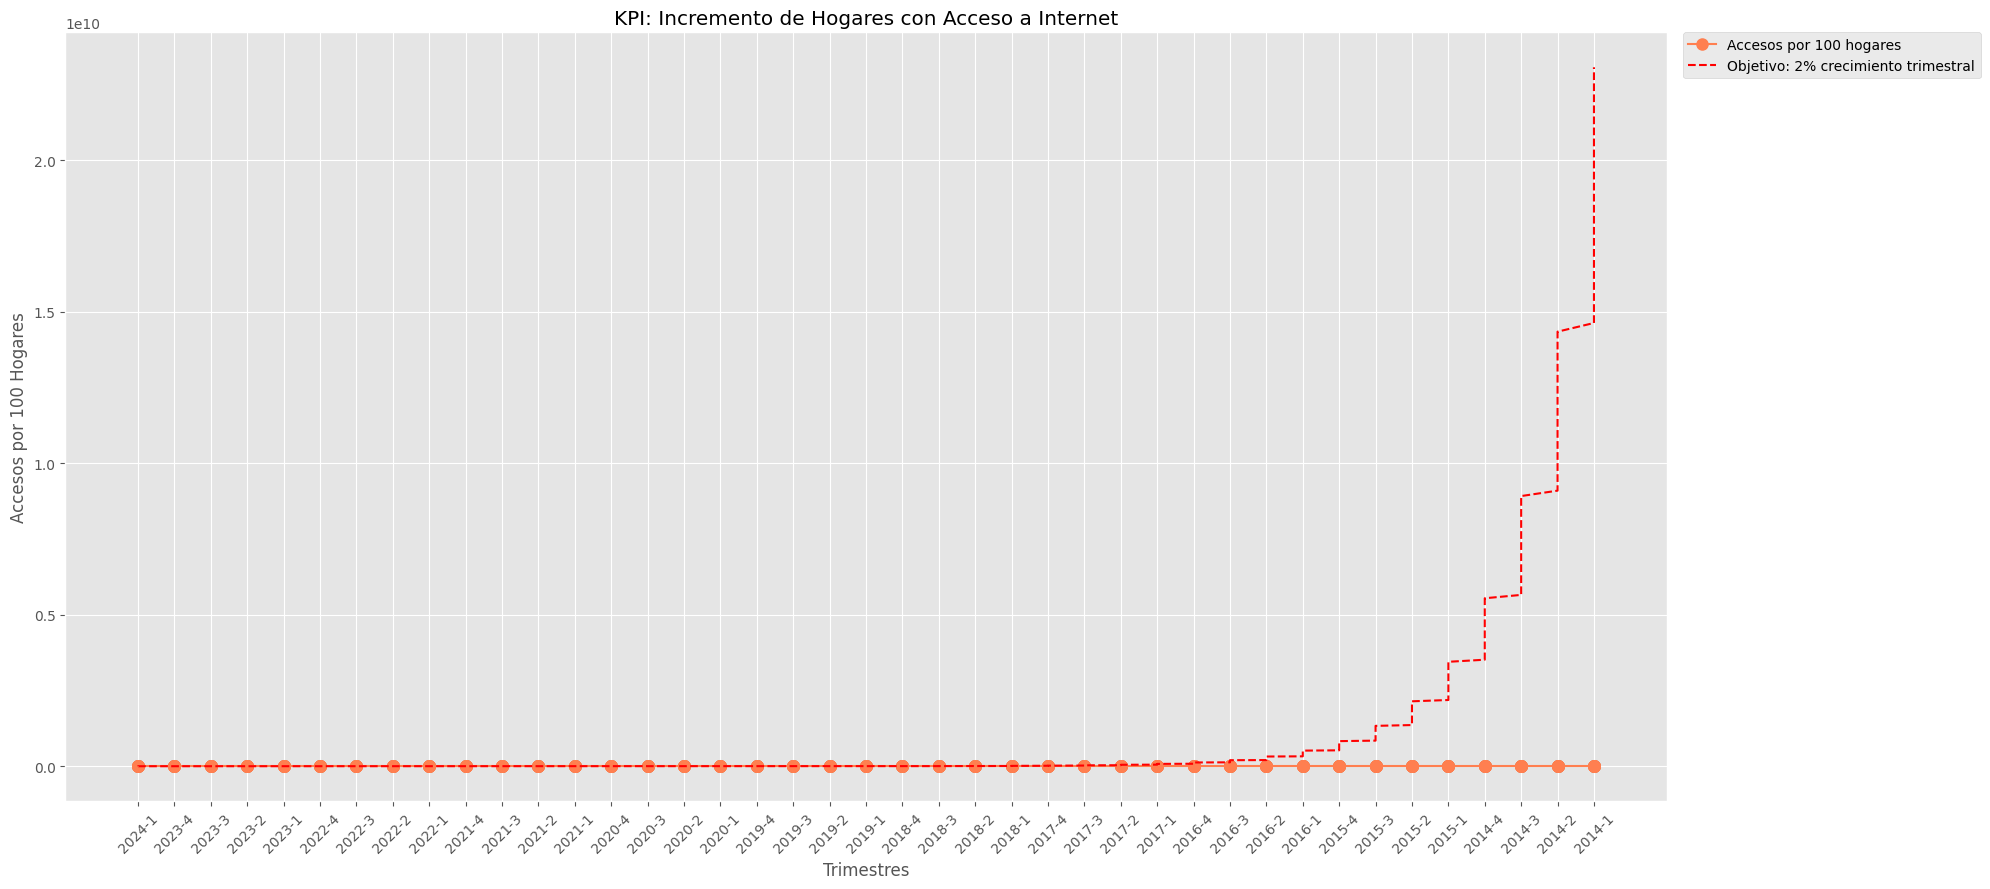


El KPI propuesto es: 
Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia. 
La fórmula es la siguiente: 
$$KPI = \left( \frac{Nuevo\ acceso - Acceso\ actual}{Acceso\ actual} \right) \times 100$$

Esto indicaría un aumento del 2% en el acceso a Internet en esa provincia para el próximo trimestre.



In [41]:
# Configuración de estilo
plt.style.use('ggplot')  
plt.rcParams['figure.figsize'] = (20, 9)  

# Gráfico 1
plt.figure()

# Calcular la línea del objetivo (crece un 2% en cada trimestre sobre el último acceso)
accesos_actuales = df_penetracion_hogares['Accesos por cada 100 hogares'].iloc[0]  # Valor inicial
objetivo = [accesos_actuales * (1 + 0.02) ** i for i in range(len(df_penetracion_hogares))]

# Convertir año y trimestre a strings para concatenar
trimestres = df_penetracion_hogares['Año'].astype(str) + '-' + df_penetracion_hogares['Trimestre'].astype(str)

plt.plot(trimestres, 
         df_penetracion_hogares['Accesos por cada 100 hogares'], marker='o', 
         label='Accesos por 100 hogares', color='coral')

plt.plot(trimestres, 
         objetivo, linestyle='--', color='red', label='Objetivo: 2% crecimiento trimestral')

plt.title('KPI: Incremento de Hogares con Acceso a Internet')
plt.xlabel('Trimestres')
plt.ylabel('Accesos por 100 Hogares')
plt.xticks(rotation=45)  # Rotar las etiquetas de los trimestres para mejor visibilidad

# Mover la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.tight_layout()  
plt.show()

# Comentario
print(r"""
El KPI propuesto es: 
Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia. 

Esto indicaría un aumento del 2% en el acceso a Internet en esa provincia para el próximo trimestre.
""")

## 2. Tasa de Adopción de Fibra Óptica
**Objetivo:** Aumentar la tasa de adopción de fibra óptica en un 5% en el próximo trimestre.

**Fórmula:**
$$
KPI = \left( \frac{\text{Número de nuevos usuarios de fibra óptica} - \text{Número de usuarios de fibra óptica (trimestre anterior)}}{\text{Número de usuarios de otras tecnologías (trimestre anterior)}} \right) \times 100
$$

**Ejemplo de uso:**
$$
KPI = \left( \frac{100 - 200}{200} \right) \times 100 = -50\%
$$

Esto indicaría que se han perdido usuarios en el trimestre, lo que podría señalar una necesidad de revisar las estrategias de marketing.

---

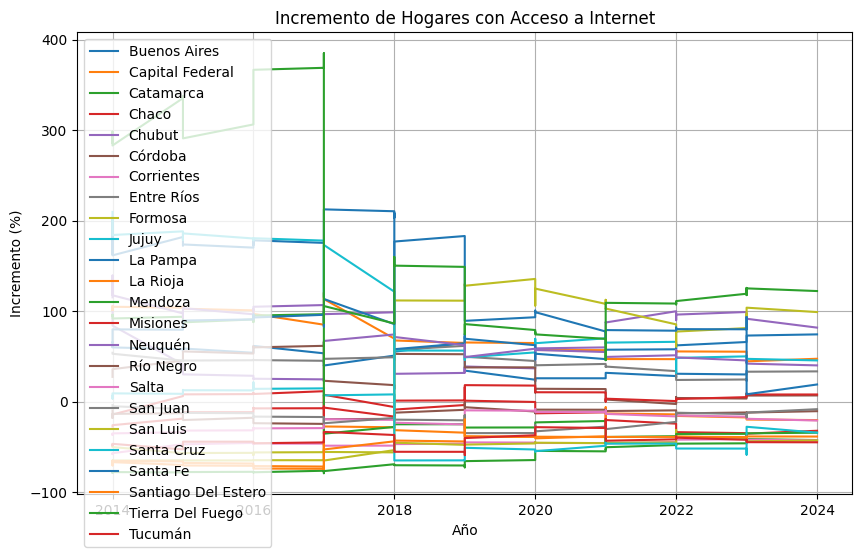

In [23]:
# Calcular KPI para el incremento de hogares conectados
df_penetracion_hogares['Incremento Hogares'] = (df_penetracion_hogares['Accesos por cada 100 hogares'] - df_penetracion_hogares['Accesos por cada 100 hogares'].shift(1)) / df_penetracion_hogares['Accesos por cada 100 hogares'].shift(1) * 100

# Graficar el incremento de hogares con acceso a internet
plt.figure(figsize=(10, 6))
for provincia in df_penetracion_hogares['Provincia'].unique():
    subset = df_penetracion_hogares[df_penetracion_hogares['Provincia'] == provincia]
    plt.plot(subset['Año'], subset['Incremento Hogares'], label=provincia)

plt.title('Incremento de Hogares con Acceso a Internet')
plt.xlabel('Año')
plt.ylabel('Incremento (%)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


## 3. Aumento en la Tasa de Conexión a Fibra Óptica
**Objetivo:** Incrementar la tasa de conexión a fibra óptica en un 10% en comparación con el trimestre anterior.

**Fórmula:**
$$
KPI = \left( \frac{\text{Conexiones de fibra óptica (nuevo trimestre)} - \text{Conexiones de fibra óptica (trimestre anterior)}}{\text{Conexiones de fibra óptica (trimestre anterior)}} \right) \times 100
$$

**Ejemplo de uso:**
$$
KPI = \left( \frac{220 - 200}{200} \right) \times 100 = 10\%
$$

Esto indicaría un crecimiento del 10% en la adopción de conexiones de fibra óptica.

---

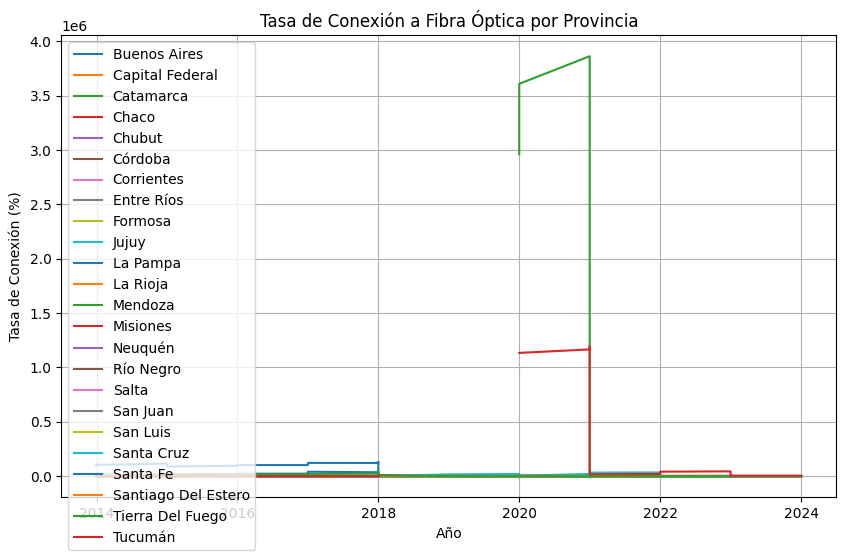

In [24]:
# Calcular KPI para la tasa de conexión a fibra óptica
df_accesos_por_tecnologia['Tasa Conexión Fibra'] = (df_accesos_por_tecnologia['Fibra óptica'] - df_accesos_por_tecnologia['Fibra óptica'].shift(1)) / df_accesos_por_tecnologia['Fibra óptica'].shift(1) * 100

# Graficar la tasa de conexión a fibra óptica
plt.figure(figsize=(10, 6))
for provincia in df_accesos_por_tecnologia['Provincia'].unique():
    subset = df_accesos_por_tecnologia[df_accesos_por_tecnologia['Provincia'] == provincia]
    plt.plot(subset['Año'], subset['Tasa Conexión Fibra'], label=provincia)

plt.title('Tasa de Conexión a Fibra Óptica por Provincia')
plt.xlabel('Año')
plt.ylabel('Tasa de Conexión (%)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


## 4. Incremento de Usuarios de Internet de Alta Velocidad
**Objetivo:** Aumentar el número de usuarios de internet de alta velocidad en un 15% en el próximo trimestre.

**Fórmula:**
$$
KPI = \left( \frac{\text{Usuarios de alta velocidad (nuevo trimestre)} - \text{Usuarios de alta velocidad (trimestre anterior)}}{\text{Usuarios de alta velocidad (trimestre anterior)}} \right) \times 100
$$

**Ejemplo de uso:**
$$
KPI = \left( \frac{1150 - 1000}{1000} \right) \times 100 = 15\%
$$

Esto indicaría que se ha logrado un aumento del 15% en los usuarios de internet de alta velocidad.

---

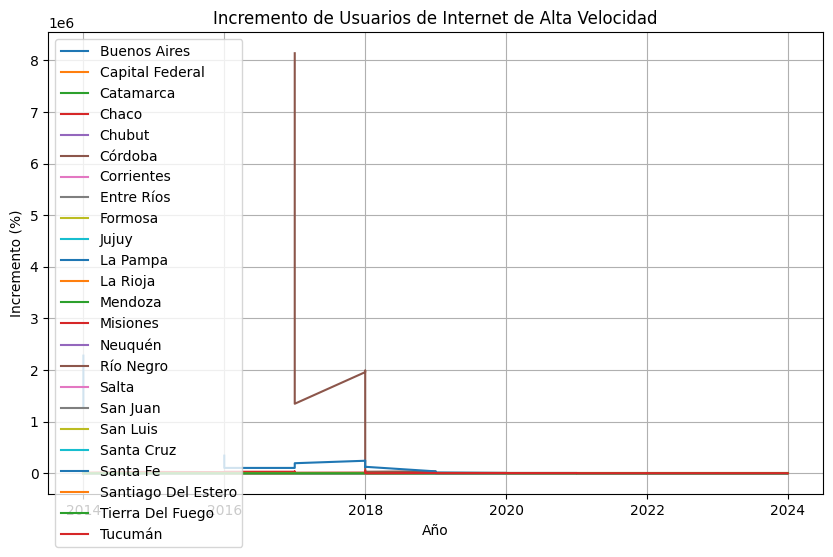

In [25]:
# Calcular KPI para el incremento de usuarios de alta velocidad
df_accesos_por_velocidad['Incremento Alta Velocidad'] = (df_accesos_por_velocidad['+ 10 Mbps - 20 Mbps'] + df_accesos_por_velocidad['+ 20 Mbps - 30 Mbps'] + df_accesos_por_velocidad['+ 30 Mbps'] - (df_accesos_por_velocidad[['+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']].shift(1).sum(axis=1))) / df_accesos_por_velocidad[['+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']].shift(1).sum(axis=1) * 100

# Graficar el incremento de usuarios de alta velocidad
plt.figure(figsize=(10, 6))
for provincia in df_accesos_por_velocidad['Provincia'].unique():
    subset = df_accesos_por_velocidad[df_accesos_por_velocidad['Provincia'] == provincia]
    plt.plot(subset['Año'], subset['Incremento Alta Velocidad'], label=provincia)

plt.title('Incremento de Usuarios de Internet de Alta Velocidad')
plt.xlabel('Año')
plt.ylabel('Incremento (%)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


## 5. Aumento en la Inversión en Infraestructura de Fibra Óptica
**Objetivo:** Incrementar la inversión en infraestructura de fibra óptica en un 20% en el próximo año.

**Fórmula:**
$$
KPI = \left( \frac{\text{Inversión en fibra óptica (nuevo año)} - \text{Inversión en fibra óptica (año anterior)}}{\text{Inversión en fibra óptica (año anterior)}} \right) \times 100
$$

**Ejemplo de uso:**
$$
KPI = \left( \frac{120000 - 100000}{100000} \right) \times 100 = 20\%
$$

Esto indicaría un aumento del 20% en la inversión en infraestructura de fibra óptica.

---

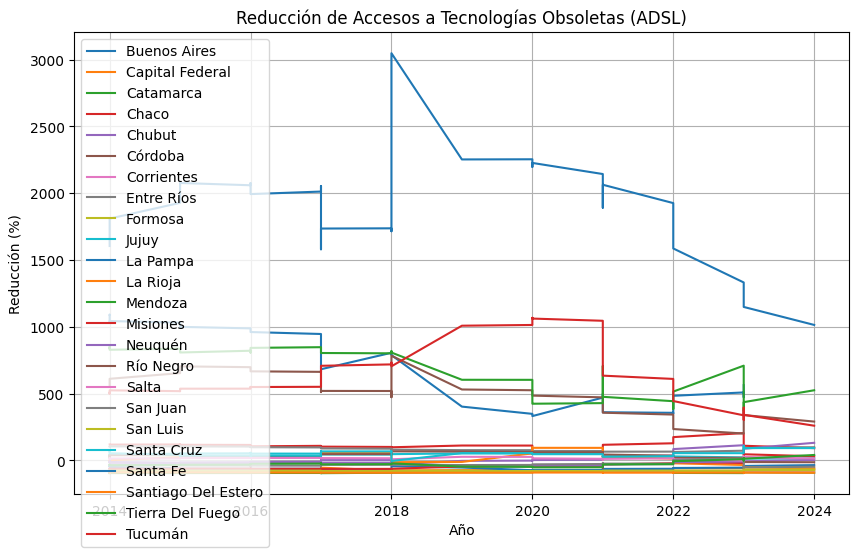

In [26]:
# Calcular KPI para la reducción de tecnologías obsoletas
df_accesos_por_tecnologia['Reducción Tecnologías Obsoletas'] = (df_accesos_por_tecnologia['ADSL'] - df_accesos_por_tecnologia['ADSL'].shift(1)) / df_accesos_por_tecnologia['ADSL'].shift(1) * 100

# Graficar la reducción de tecnologías obsoletas
plt.figure(figsize=(10, 6))
for provincia in df_accesos_por_tecnologia['Provincia'].unique():
    subset = df_accesos_por_tecnologia[df_accesos_por_tecnologia['Provincia'] == provincia]
    plt.plot(subset['Año'], subset['Reducción Tecnologías Obsoletas'], label=provincia)

plt.title('Reducción de Accesos a Tecnologías Obsoletas (ADSL)')
plt.xlabel('Año')
plt.ylabel('Reducción (%)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


## 6. Reducción de Accesos a Tecnologías Obsoletas (Dial-up, ADSL)
**Objetivo:** Disminuir el uso de tecnologías obsoletas en un 15% en el próximo trimestre.

**Fórmula:**
$$
KPI = \left( \frac{\text{Número de usuarios de tecnologías obsoletas (trimestre anterior)} - \text{Número de usuarios de tecnologías obsoletas (trimestre actual)}}{\text{Número de usuarios de tecnologías obsoletas (trimestre anterior)}} \right) \times 100
$$

**Ejemplo de uso:**
$$
KPI = \left( \frac{100 - 85}{100} \right) \times 100 = 15\%
$$

Esto indicaría una reducción del 15% en el uso de tecnologías obsoletas.